# Multivariate Predictive Analysis I

# Logistic Regression
### Name: Sunit Jadeja


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
pd=pd.read_excel("/Users/sunitjadeja/Desktop/TISS All Subject/Multivariate Prediction Analysis/Unmesh Sir/Unmesh Sir Assignment Dataset.xls")

# Filtering Data With Pakistan

In [3]:
df=pd[pd["country"].isin(["Pakistan"])]
print(df)

        country       industry   scale scale_conti  scale.1 subfirm  female  \
11868  Pakistan  Manufacturing   Large           0      2.0      No  Female   
11869  Pakistan  Manufacturing   Large           0      2.0      No    Male   
11870  Pakistan  Manufacturing   Large           0      2.0      No    Male   
11871  Pakistan  Manufacturing  Medium           1      1.0      No    Male   
11872  Pakistan  Manufacturing  Medium           1      1.0      No    Male   
...         ...            ...     ...         ...      ...     ...     ...   
13110  Pakistan  Manufacturing  Medium           1      1.0      No    Male   
13111  Pakistan  Manufacturing   Large           0      2.0      No    Male   
13112  Pakistan  Manufacturing  Medium           1      1.0      No    Male   
13113  Pakistan  Manufacturing  Medium           1      1.0      No    Male   
13114  Pakistan  Manufacturing   Small           1      0.0      No    Male   

      quality generator website  ... formtrain     

# Data Pre-Processing

In [4]:
# print (df.isnull().sum())
#print (df.dtypes)
# print (df.info)
# print (df.columns)
# # print (df.head())
# sns.heatmap(df.isnull(),cbar=True)
# df.describe()

country        0
industry       0
scale          0
scale_conti    0
scale.1        0
subfirm        0
female         0
quality        0
generator      0
website        0
chamber        0
marketplace    0
foreigntech    0
informal       0
prodinnov      0
procinnov      0
orginnov       0
minnov         0
research       0
learning       0
capacity       0
formtrain      0
politics       0
court          0
age            0
sales          0
school         0
topman         0
skill          0
capital        0
lastmile       0
dtype: int64


<AxesSubplot:>

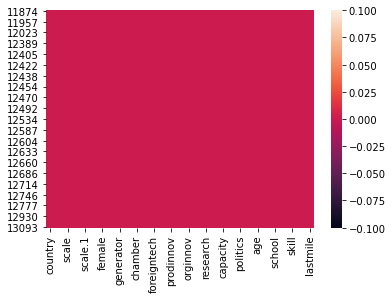

In [4]:
pak_NO_NA=(df.dropna(how="any"))
pak_NO_NA
print (pak_NO_NA.isnull().sum())
sns.heatmap(pak_NO_NA.isnull(),cbar=True)

# EDA

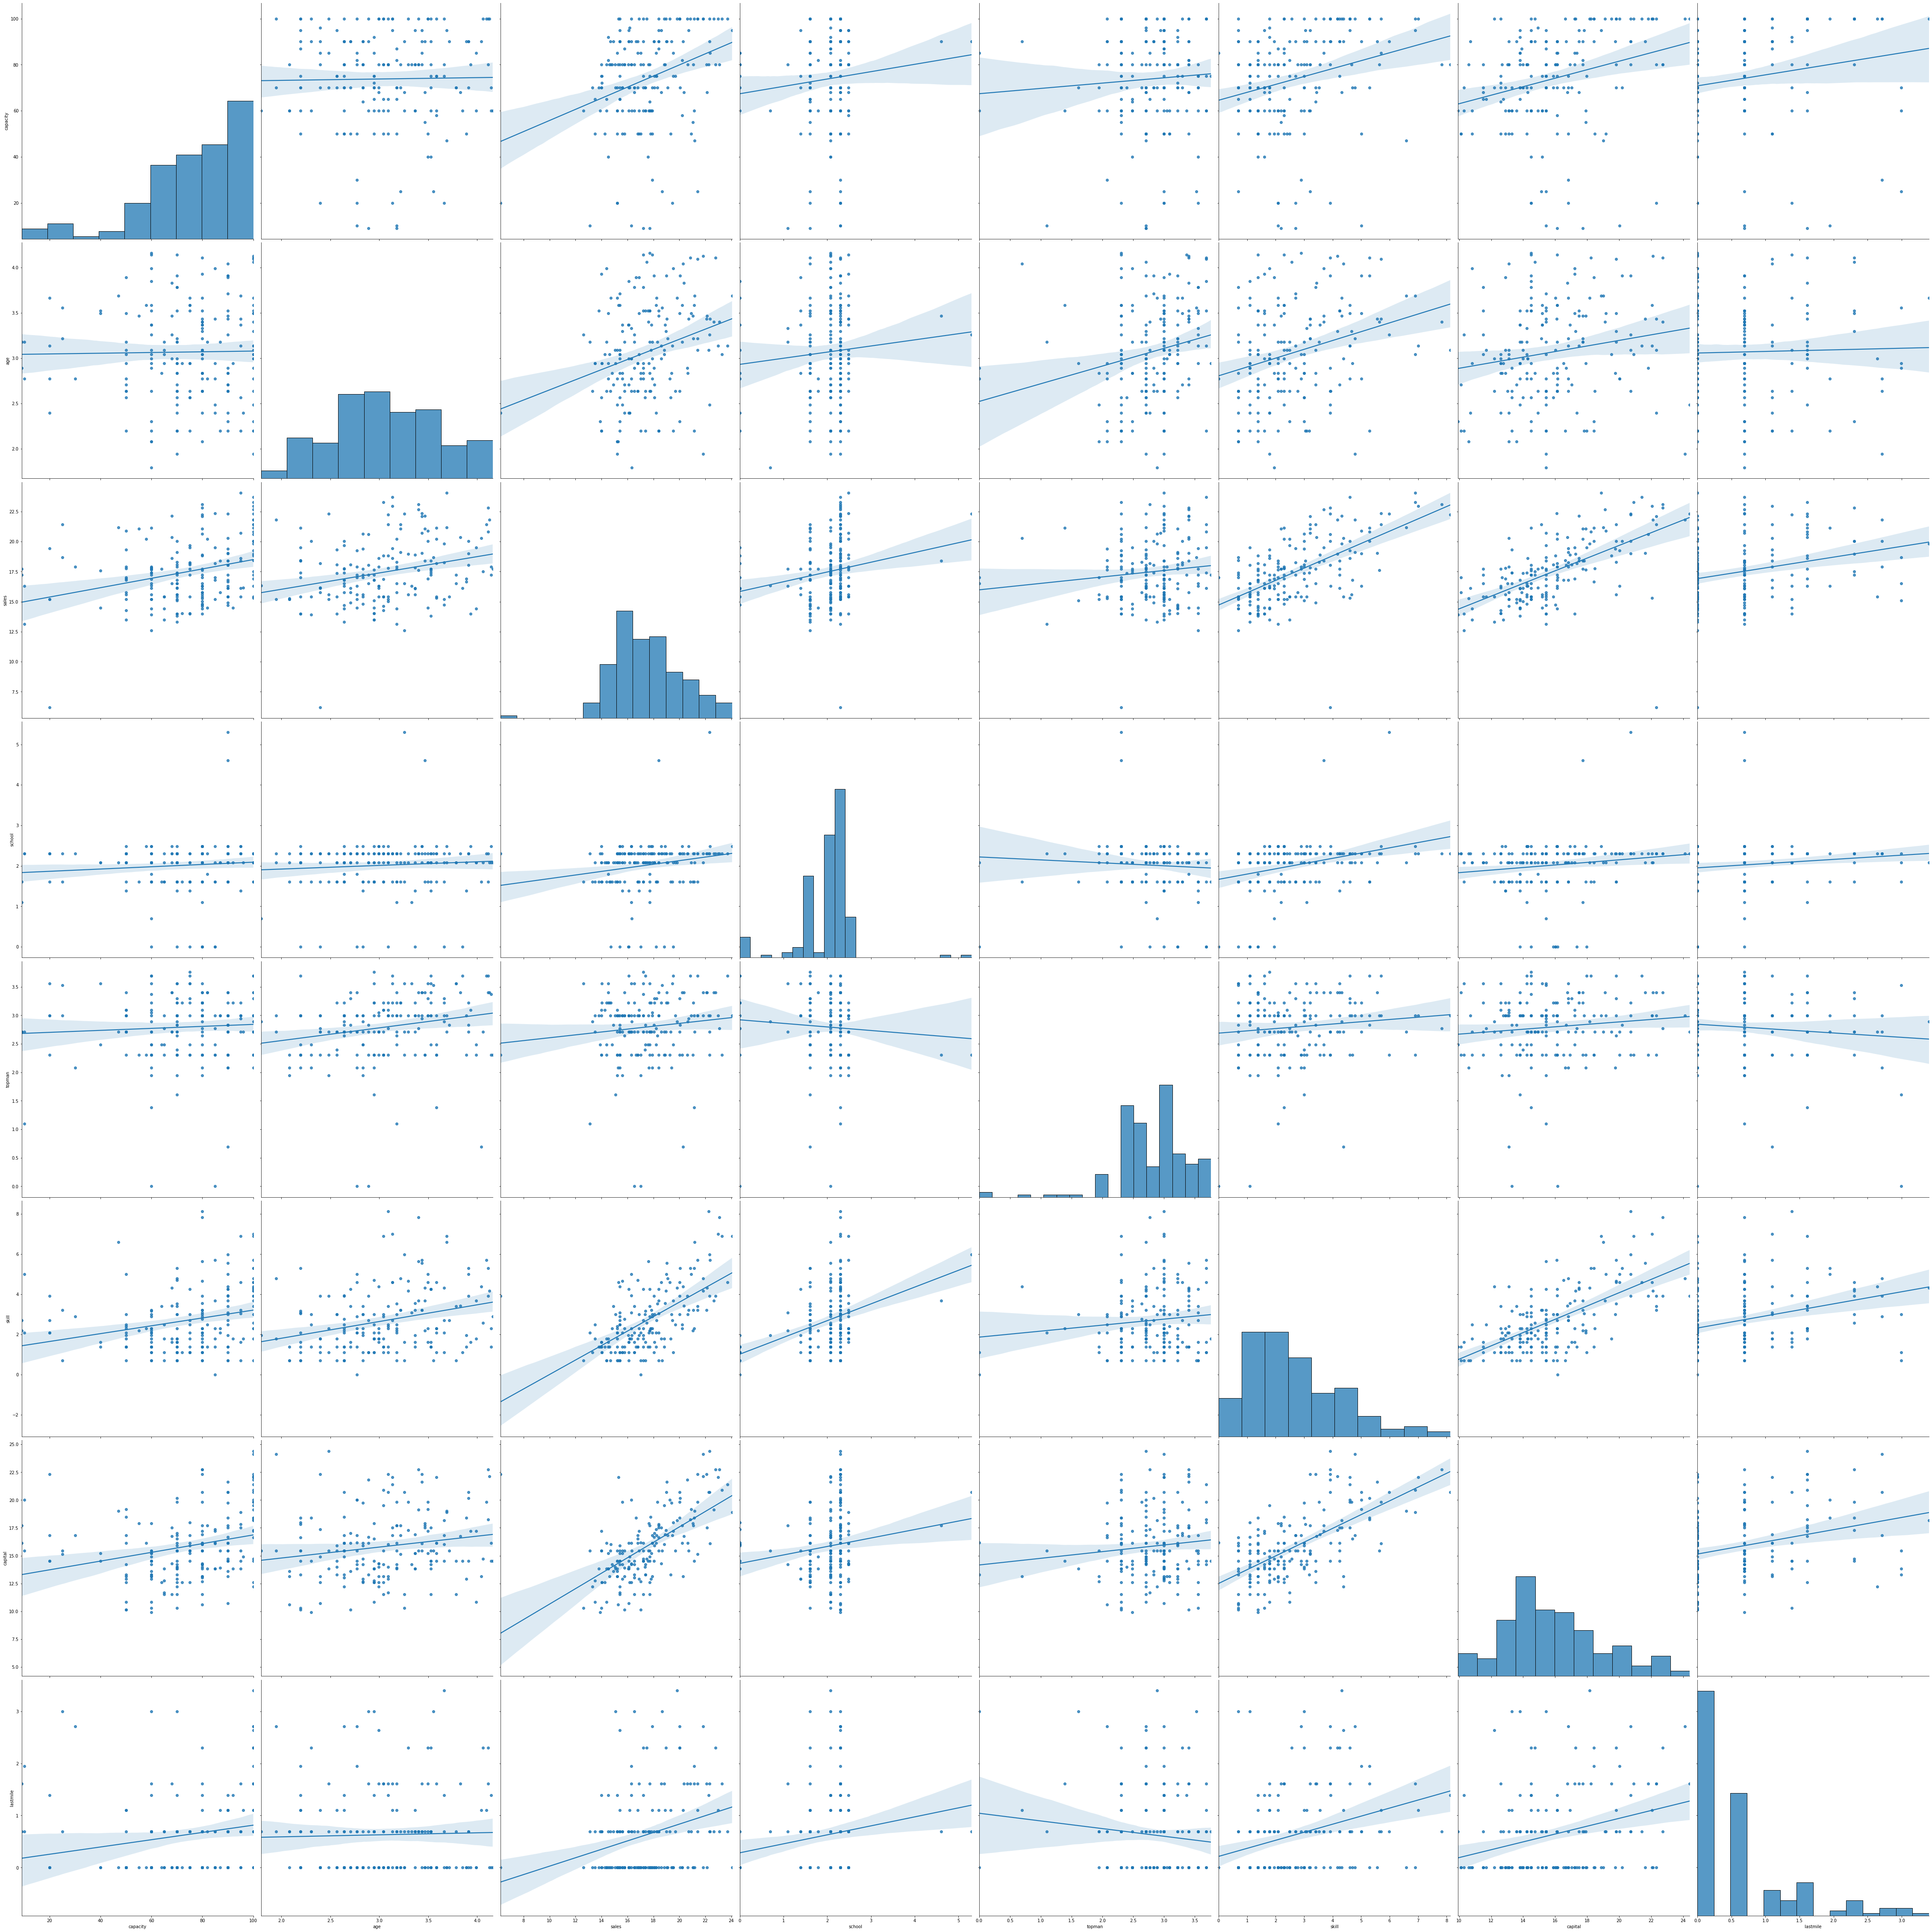

In [6]:
df_n = pak_NO_NA[['capacity','age','sales','school','topman','skill','capital','lastmile']]
sns.pairplot(df_n , height=8, kind="reg")

Small     88
Medium    55
Large     38
Name: scale, dtype: int64

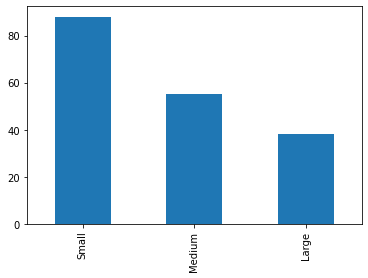

In [7]:
pak_NO_NA['scale'].value_counts().plot.bar()
pak_NO_NA['scale'].value_counts()

No     130
Yes     51
Name: minnov, dtype: int64

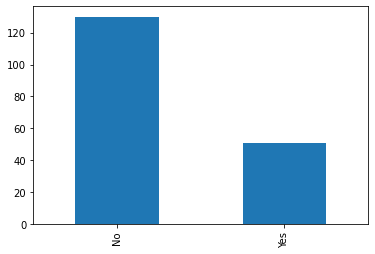

In [8]:
pak_NO_NA['minnov'].value_counts().plot.bar()
pak_NO_NA['minnov'].value_counts()

No     97
Yes    84
Name: prodinnov, dtype: int64

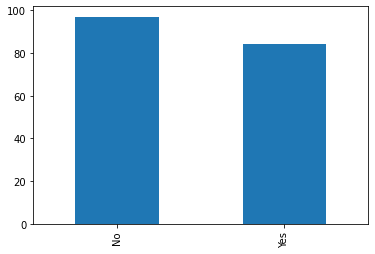

In [9]:
pak_NO_NA['prodinnov'].value_counts().plot.bar()
pak_NO_NA['prodinnov'].value_counts()

No     103
Yes     78
Name: procinnov, dtype: int64

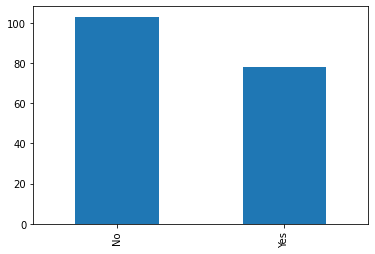

In [10]:
pak_NO_NA['procinnov'].value_counts().plot.bar()
pak_NO_NA['procinnov'].value_counts()

No     128
Yes     53
Name: orginnov, dtype: int64

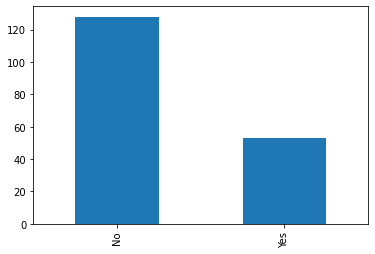

In [11]:
pak_NO_NA['orginnov'].value_counts().plot.bar()
pak_NO_NA['orginnov'].value_counts()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='scale'>

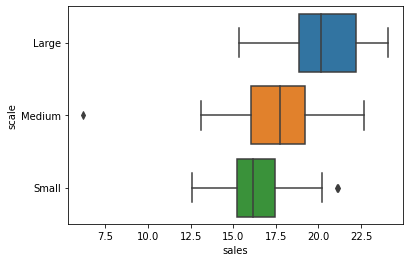

In [12]:
sns.boxplot(pak_NO_NA['sales'],pak_NO_NA['scale'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capacity', ylabel='scale'>

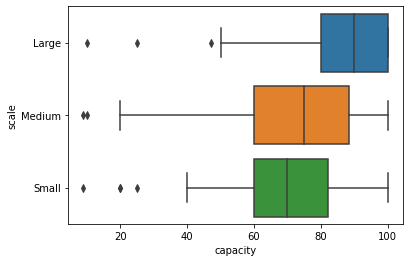

In [13]:
sns.boxplot(pak_NO_NA['capacity'],pak_NO_NA['scale'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='scale', ylabel='capital'>

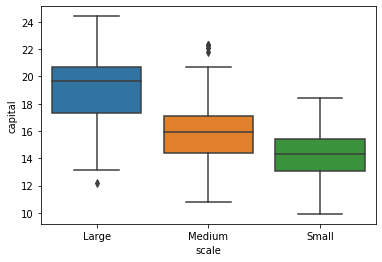

In [14]:
sns.boxplot(pak_NO_NA['scale'],pak_NO_NA['capital'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='scale', ylabel='skill'>

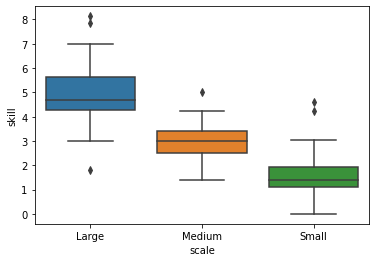

In [15]:
sns.boxplot(pak_NO_NA['scale'],pak_NO_NA['skill'])

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

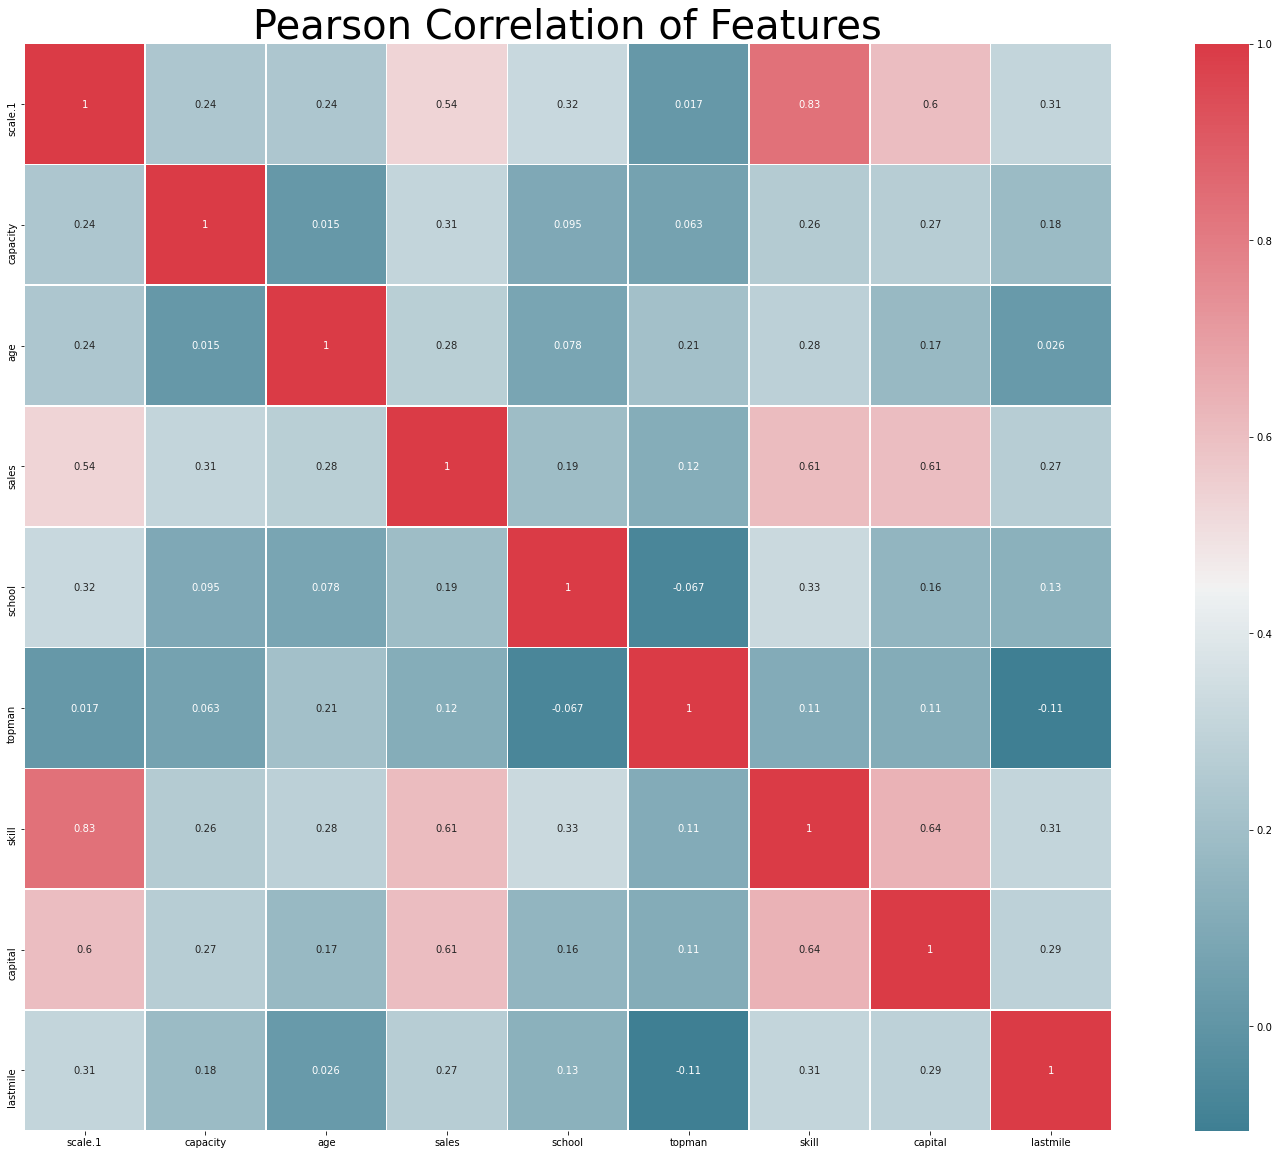

In [16]:
corr = pak_NO_NA.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(30, 20))
plt.title('Pearson Correlation of Features', y=1, size=40)
sns.heatmap(corr,vmax=1.0,cmap=cmap,square=True,linewidths=0.5,annot=True)

# Logistic Modelling With Large Industry

In [13]:
# # logistic regression model 3 with large
import statsmodels.api as sm
X = pak_NO_NA[["capital","skill","lastmile","sales","age","topman","school"]]
X = sm.add_constant(X)
Y = pak_NO_NA[['scale_conti']]
model_scale_3 =sm.Logit(Y.astype(float), X.astype(float)).fit()
print(model_scale_3.summary())

Optimization terminated successfully.
         Current function value: 0.153131
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            scale_conti   No. Observations:                  181
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            7
Date:                Sun, 16 May 2021   Pseudo R-squ.:                  0.7020
Time:                        17:41:22   Log-Likelihood:                -27.717
converged:                       True   LL-Null:                       -93.013
Covariance Type:            nonrobust   LLR p-value:                 4.727e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6096      3.824      3.297      0.001       5.115      20.105
capital       -0.0574      0.

In [14]:
np.exp(model_scale_3.params)

const       299413.361208
capital          0.944197
skill            0.069935
lastmile         0.687574
sales            0.776073
age              1.905647
topman           3.530909
school           0.534212
dtype: float64

In [15]:
cols_drop = ["country","industry","scale","scale.1","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","prodinnov","procinnov","orginnov","minnov","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA1["scale_conti"] = le.fit_transform(pak_NO_NA1["scale_conti"])
y = pak_NO_NA1["scale_conti"]
X = pak_NO_NA1.drop(columns=['scale_conti'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.91      1.00      0.96        43

    accuracy                           0.93        55
   macro avg       0.96      0.83      0.88        55
weighted avg       0.93      0.93      0.92        55



In [21]:
model_scale_3_conf= confusion_matrix(y_test, Y_predict)
print (model_scale_3_conf)

[[ 8  4]
 [ 0 43]]


In [22]:
# # logistic regression model 3 with large
import statsmodels.api as sm
X = pak_NO_NA[["capital","skill","lastmile","sales","age","topman","school"]]
X = sm.add_constant(X)
#sm.Logit(endog=Y, exog=X).fit()
le =preprocessing.LabelEncoder()
pak_NO_NA["minnov"] = le.fit_transform(pak_NO_NA["minnov"])
Y = pak_NO_NA[['minnov']]
model_minnov_3 =sm.Logit(Y.astype(float), X.astype(float)).fit()
print(model_minnov_3.summary())

Optimization terminated successfully.
         Current function value: 0.560674
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 minnov   No. Observations:                  181
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 May 2021   Pseudo R-squ.:                 0.05708
Time:                        23:00:18   Log-Likelihood:                -101.48
converged:                       True   LL-Null:                       -107.63
Covariance Type:            nonrobust   LLR p-value:                   0.09151
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7988      1.748     -1.601      0.109      -6.225       0.627
capital        0.0380      0.

<ipython-input-22-2e12a5d27f07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_NO_NA["minnov"] = le.fit_transform(pak_NO_NA["minnov"])


In [23]:
np.exp(model_minnov_3.params)

const       0.060882
capital     1.038735
skill       1.078920
lastmile    1.555361
sales       0.996024
age         1.261628
topman      0.814565
school      1.373448
dtype: float64

In [24]:
cols_drop = ["country","industry","scale","scale_conti","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","prodinnov","procinnov","orginnov","scale.1","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA1["minnov"] = le.fit_transform(pak_NO_NA1["minnov"])
y = pak_NO_NA1["minnov"]
X = pak_NO_NA1.drop(columns=['minnov'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        39
           1       0.14      0.06      0.09        16

    accuracy                           0.62        55
   macro avg       0.42      0.45      0.42        55
weighted avg       0.53      0.62      0.56        55



In [26]:
print(confusion_matrix(y_test, Y_predict))

[[33  6]
 [15  1]]


In [27]:
# # logistic regression model 3 with large
import statsmodels.api as sm
X = pak_NO_NA[["capital","skill","lastmile","sales","age","topman","school"]]
X = sm.add_constant(X)
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA["procinnov"] = le.fit_transform(pak_NO_NA["procinnov"])
Y = pak_NO_NA[['procinnov']]
model_procinnov_3 =sm.Logit(Y.astype(float), X.astype(float)).fit()
print(model_procinnov_3.summary())

Optimization terminated successfully.
         Current function value: 0.457697
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              procinnov   No. Observations:                  181
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 May 2021   Pseudo R-squ.:                  0.3304
Time:                        23:00:18   Log-Likelihood:                -82.843
converged:                       True   LL-Null:                       -123.73
Covariance Type:            nonrobust   LLR p-value:                 5.999e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0277      2.291     -3.941      0.000     -13.517      -4.538
capital        0.3529      0.

<ipython-input-27-a76327cefea3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_NO_NA["procinnov"] = le.fit_transform(pak_NO_NA["procinnov"])


In [28]:
np.exp(model_procinnov_3.params)

const       0.000120
capital     1.423166
skill       1.171365
lastmile    3.484867
sales       1.042405
age         0.651304
topman      2.011813
school      1.351321
dtype: float64

In [29]:
cols_drop = ["country","industry","scale","scale_conti","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","prodinnov","minnov","orginnov","scale.1","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA1["procinnov"] = le.fit_transform(pak_NO_NA1["procinnov"])
y = pak_NO_NA1["procinnov"]
X = pak_NO_NA1.drop(columns=['procinnov'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75        29
           1       0.75      0.58      0.65        26

    accuracy                           0.71        55
   macro avg       0.72      0.70      0.70        55
weighted avg       0.72      0.71      0.70        55



In [31]:
print(confusion_matrix(y_test, Y_predict))

[[24  5]
 [11 15]]


In [32]:
# # logistic regression model 3 with large
import statsmodels.api as sm
X = pak_NO_NA[["capital","skill","lastmile","sales","age","topman","school"]]
X = sm.add_constant(X)
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA["prodinnov"] = le.fit_transform(pak_NO_NA["prodinnov"])
#sm.Logit(endog=Y, exog=X).fit()
Y = pak_NO_NA[['prodinnov']]
model_prodinnov_3 =sm.Logit(Y.astype(float), X.astype(float)).fit()
print(model_prodinnov_3.summary())

Optimization terminated successfully.
         Current function value: 0.522798
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              prodinnov   No. Observations:                  181
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 May 2021   Pseudo R-squ.:                  0.2429
Time:                        23:00:18   Log-Likelihood:                -94.626
converged:                       True   LL-Null:                       -124.99
Covariance Type:            nonrobust   LLR p-value:                 1.078e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4779      2.058     -3.147      0.002     -10.512      -2.444
capital        0.2674      0.

<ipython-input-32-d86f34cde417>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_NO_NA["prodinnov"] = le.fit_transform(pak_NO_NA["prodinnov"])


In [33]:
np.exp(model_prodinnov_3.params)

const       0.001537
capital     1.306628
skill       1.071082
lastmile    3.170002
sales       0.973373
age         0.634835
topman      2.169686
school      1.592648
dtype: float64

In [34]:
cols_drop = ["country","industry","scale","scale_conti","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","procinnov","minnov","orginnov","scale.1","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA1["prodinnov"] = le.fit_transform(pak_NO_NA1["prodinnov"])
y = pak_NO_NA1["prodinnov"]
X = pak_NO_NA1.drop(columns=['prodinnov'])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.63      0.85      0.72        26
           1       0.80      0.55      0.65        29

    accuracy                           0.69        55
   macro avg       0.71      0.70      0.69        55
weighted avg       0.72      0.69      0.69        55



In [36]:
print(confusion_matrix(y_test, Y_predict))

[[22  4]
 [13 16]]


In [37]:
# # logistic regression model 3
import statsmodels.api as sm
X = pak_NO_NA[["capital","skill","lastmile","sales","age","topman","school"]]
X = sm.add_constant(X)
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA["orginnov"] = le.fit_transform(pak_NO_NA["orginnov"])
#sm.Logit(endog=Y, exog=X).fit()
Y = pak_NO_NA[['orginnov']]
model_orginnov_3 =sm.Logit(Y.astype(float), X.astype(float)).fit()
print(model_orginnov_3.summary())

Optimization terminated successfully.
         Current function value: 0.525469
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               orginnov   No. Observations:                  181
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 May 2021   Pseudo R-squ.:                  0.1310
Time:                        23:00:18   Log-Likelihood:                -95.110
converged:                       True   LL-Null:                       -109.44
Covariance Type:            nonrobust   LLR p-value:                 0.0001665
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2904      1.968     -3.197      0.001     -10.147      -2.434
capital        0.0977      0.

<ipython-input-37-cfa559c6973d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_NO_NA["orginnov"] = le.fit_transform(pak_NO_NA["orginnov"])


In [38]:
np.exp(model_orginnov_3.params)

const       0.001854
capital     1.102618
skill       0.921952
lastmile    1.561702
sales       1.124917
age         0.712256
topman      1.107024
school      3.192463
dtype: float64

In [39]:
cols_drop = ["country","industry","scale","scale_conti","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","procinnov","minnov","prodinnov","scale.1","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA1["orginnov"] = le.fit_transform(pak_NO_NA1["orginnov"])
y = pak_NO_NA1["orginnov"]
X = pak_NO_NA1.drop(columns=['orginnov'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.67      0.43      0.52        14

    accuracy                           0.80        55
   macro avg       0.75      0.68      0.70        55
weighted avg       0.79      0.80      0.78        55



In [41]:
print(confusion_matrix(y_test, Y_predict))

[[38  3]
 [ 8  6]]


# Removing Large Industry Rows & Filtering Data

In [75]:
pak_NO_NA.drop(pak_NO_NA.loc[pak_NO_NA['scale.1']==2].index, inplace=True)
# print(pak_NO_NA)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
# # logistic regression model 2 scale without large
import statsmodels.api as sm
columns=['capital','skill','lastmile','sales','age','topman','school']
X = pak_NO_NA[columns]
X = sm.add_constant(X)
y = pak_NO_NA[['scale.1']]
model_scale_2=sm.Logit(endog= np.array(y).astype(int), exog=X.astype(int)).fit()
print(model_scale_2.summary())

Optimization terminated successfully.
         Current function value: 0.388425
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  143
Model:                          Logit   Df Residuals:                      135
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 May 2021   Pseudo R-squ.:                  0.4170
Time:                        23:00:18   Log-Likelihood:                -55.545
converged:                       True   LL-Null:                       -95.278
Covariance Type:            nonrobust   LLR p-value:                 1.770e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0404      2.432     -2.073      0.038      -9.807      -0.274
capital        0.2026      0.

In [44]:
np.exp(model_scale_2.params)

const       0.006471
capital     1.224527
skill       9.291280
lastmile    0.630773
sales       0.899691
age         1.145464
topman      0.563245
school      1.371445
dtype: float64

In [45]:
cols_drop = ["country","industry","scale","scale_conti","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","prodinnov","procinnov","orginnov","minnov","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
# from sklearn import preprocessing
# le =preprocessing.LabelEncoder()
# pak_NO_NA1["scale.1"] = le.fit_transform(pak_NO_NA1["scale.1"])
y = pak_NO_NA1["scale.1"]
X = pak_NO_NA1.drop(columns=['scale.1'])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88         8
         1.0       0.86      0.86      0.86         7

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



In [47]:
model_scale_2_conf=confusion_matrix(y_test, Y_predict)
print(model_scale_2_conf)

[[7 1]
 [1 6]]


# Stargazer Table For Industry

In [48]:
from stargazer.stargazer import Stargazer, LineLocation
stargazer_scale = Stargazer([model_scale_3,model_scale_2])
from IPython.core.display import HTML
HTML(stargazer_scale.render_html())
stargazer_scale.title('Study of Pakistan Industries Scale')
stargazer_scale.custom_columns(['SMEs & Large', 'Only SMEs'], [1, 1])
stargazer_scale.show_model_numbers(False)
stargazer_scale.significant_digits(2)
stargazer_scale.covariate_order(['const', 'skill','age', 'capital', 'lastmile','sales','school','topman'])
stargazer_scale.add_custom_notes(['skill is highly significant for any industry at 0.01 significance level'])
stargazer_scale.cov_spacing = 2
# stargazer.add_custom_notes(['First note', 'Second note'])
# stargazer
stargazer_scale
# stargazer.render_html()
# stargazer.render_latex()

In [49]:
# # logistic regression model### 2 without large
import statsmodels.api as sm
X = pak_NO_NA[["capital","skill","lastmile","sales","age","topman","school"]]
X = sm.add_constant(X)
pak_NO_NA["minnov"] = le.fit_transform(pak_NO_NA["minnov"])
#sm.Logit(endog=Y, exog=X).fit()
Y = pak_NO_NA[['minnov']]
model_minnov_2 =sm.Logit(Y.astype(float), X.astype(float)).fit()
print(model_minnov_2.summary())

<ipython-input-49-12bc1557cfcf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_NO_NA["minnov"] = le.fit_transform(pak_NO_NA["minnov"])


Optimization terminated successfully.
         Current function value: 0.522059
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 minnov   No. Observations:                  143
Model:                          Logit   Df Residuals:                      135
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 May 2021   Pseudo R-squ.:                 0.07477
Time:                        23:00:19   Log-Likelihood:                -74.654
converged:                       True   LL-Null:                       -80.687
Covariance Type:            nonrobust   LLR p-value:                   0.09841
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8719      2.177     -2.238      0.025      -9.140      -0.604
capital        0.0393      0.

In [50]:
np.exp(model_minnov_2.params)

const       0.007659
capital     1.040034
skill       0.942817
lastmile    1.899796
sales       1.127730
age         1.609733
topman      0.887622
school      0.892011
dtype: float64

In [51]:
cols_drop = ["country","industry","scale","scale_conti","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","prodinnov","procinnov","orginnov","scale.1","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA1["minnov"] = le.fit_transform(pak_NO_NA1["minnov"])
y = pak_NO_NA1["minnov"]
X = pak_NO_NA1.drop(columns=['minnov'])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        33
           1       0.50      0.10      0.17        10

    accuracy                           0.77        43
   macro avg       0.64      0.53      0.52        43
weighted avg       0.72      0.77      0.70        43



In [53]:
print(confusion_matrix(y_test, Y_predict))

[[32  1]
 [ 9  1]]


# Stargazer Table For Marketing Innovation

In [54]:
from stargazer.stargazer import Stargazer, LineLocation
stargazer_scale = Stargazer([model_minnov_3,model_minnov_2])
from IPython.core.display import HTML
HTML(stargazer_scale.render_html())
stargazer_scale.title('Study of Pakistan Industries Marketing Innovation')
stargazer_scale.custom_columns(['SMEs & Large', 'Only SMEs'], [1, 1])
stargazer_scale.show_model_numbers(False)
stargazer_scale.significant_digits(2)
stargazer_scale.covariate_order(['const', 'lastmile','skill','age', 'capital','sales','school','topman'])
stargazer_scale.add_custom_notes(['lastmile is significant for any industry at 0.05 significance level'])
stargazer_scale.cov_spacing = 2
# stargazer.add_custom_notes(['First note', 'Second note'])
# stargazer
stargazer_scale

In [55]:
# # logistic regression model 2
import statsmodels.api as sm
X = pak_NO_NA[["capital","skill","lastmile","sales","age","topman","school"]]
X = sm.add_constant(X)
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA["procinnov"] = le.fit_transform(pak_NO_NA["procinnov"])
Y = pak_NO_NA[['procinnov']]
model_procinnov_2 =sm.Logit(Y.astype(float), X.astype(float)).fit()
print(model_procinnov_2.summary())

<ipython-input-55-db5d7764984d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_NO_NA["procinnov"] = le.fit_transform(pak_NO_NA["procinnov"])


Optimization terminated successfully.
         Current function value: 0.470849
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              procinnov   No. Observations:                  143
Model:                          Logit   Df Residuals:                      135
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 May 2021   Pseudo R-squ.:                  0.2504
Time:                        23:00:19   Log-Likelihood:                -67.331
converged:                       True   LL-Null:                       -89.822
Covariance Type:            nonrobust   LLR p-value:                 1.379e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5430      2.625     -3.636      0.000     -14.688      -4.398
capital        0.3710      0.

In [56]:
np.exp(model_procinnov_2.params)

const       0.000072
capital     1.449196
skill       0.806864
lastmile    4.480915
sales       1.093818
age         0.639487
topman      2.205324
school      1.215084
dtype: float64

In [57]:
cols_drop = ["country","industry","scale","scale_conti","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","prodinnov","minnov","orginnov","scale.1","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA1["procinnov"] = le.fit_transform(pak_NO_NA1["procinnov"])
y = pak_NO_NA1["procinnov"]
X = pak_NO_NA1.drop(columns=['procinnov'])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.67      0.55      0.60        11

    accuracy                           0.81        43
   macro avg       0.76      0.73      0.74        43
weighted avg       0.81      0.81      0.81        43



In [59]:
print(confusion_matrix(y_test, Y_predict))

[[29  3]
 [ 5  6]]


# Stargazer Table For Process Innovation

In [60]:
from stargazer.stargazer import Stargazer, LineLocation
stargazer_scale = Stargazer([model_procinnov_3,model_procinnov_2])
from IPython.core.display import HTML
HTML(stargazer_scale.render_html())
stargazer_scale.title('Study of Pakistan Industries Process Innovation')
stargazer_scale.custom_columns(['SMEs & Large', 'Only SMEs'], [1, 1])
stargazer_scale.show_model_numbers(False)
stargazer_scale.significant_digits(2)
stargazer_scale.covariate_order(['const', 'capital','lastmile','topman','skill','age','sales','school',])
stargazer_scale.add_custom_notes(['Capital & Lastmile is highly significant for all industry at 0.01 significance level','while topman is significant at 0.1 for both all industry'])
stargazer_scale.cov_spacing = 2
# stargazer.add_custom_notes(['First note', 'Second note'])
# stargazer
stargazer_scale

In [61]:
# # logistic regression model 2 without large
import statsmodels.api as sm
X = pak_NO_NA[["capital","skill","lastmile","sales","age","topman","school"]]
X = sm.add_constant(X)
pak_NO_NA["prodinnov"] = le.fit_transform(pak_NO_NA["prodinnov"])
#sm.Logit(endog=Y, exog=X).fit()
Y = pak_NO_NA[['prodinnov']]
model_prodinnov_2 =sm.Logit(Y.astype(float), X.astype(float)).fit()
print(model_prodinnov_2.summary())

<ipython-input-61-6e22e869f77b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_NO_NA["prodinnov"] = le.fit_transform(pak_NO_NA["prodinnov"])


Optimization terminated successfully.
         Current function value: 0.525921
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              prodinnov   No. Observations:                  143
Model:                          Logit   Df Residuals:                      135
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 May 2021   Pseudo R-squ.:                  0.2066
Time:                        23:00:19   Log-Likelihood:                -75.207
converged:                       True   LL-Null:                       -94.793
Covariance Type:            nonrobust   LLR p-value:                 1.812e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8640      2.415     -3.256      0.001     -12.598      -3.130
capital        0.3526      0.

In [62]:
np.exp(model_prodinnov_2.params)

const       0.000384
capital     1.422705
skill       0.683389
lastmile    4.151456
sales       0.990754
age         0.623046
topman      2.702868
school      1.579772
dtype: float64

In [63]:
cols_drop = ["country","industry","scale","scale_conti","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","procinnov","minnov","orginnov","scale.1","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA1["prodinnov"] = le.fit_transform(pak_NO_NA1["prodinnov"])
y = pak_NO_NA1["prodinnov"]
X = pak_NO_NA1.drop(columns=['prodinnov'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.63      0.88      0.73        25
           1       0.62      0.28      0.38        18

    accuracy                           0.63        43
   macro avg       0.63      0.58      0.56        43
weighted avg       0.63      0.63      0.59        43



In [65]:
print(confusion_matrix(y_test, Y_predict))

[[22  3]
 [13  5]]


# Stargazer Table For Product Innovation

In [66]:
from stargazer.stargazer import Stargazer, LineLocation
stargazer_scale = Stargazer([model_prodinnov_3,model_prodinnov_2])
from IPython.core.display import HTML
HTML(stargazer_scale.render_html())
stargazer_scale.title('Study of Pakistan Industries Product Innovation')
stargazer_scale.custom_columns(['SMEs & Large', 'Only SMEs'], [1, 1])
stargazer_scale.show_model_numbers(False)
stargazer_scale.significant_digits(2)
stargazer_scale.covariate_order(['const', 'capital','lastmile','topman','skill','age','sales','school'])
stargazer_scale.add_custom_notes(['Capital & Lastmile is highly significant for all industry at 0.01 significance level', 'while topman is significant at 0.1 for both all industry'])
stargazer_scale.cov_spacing = 2
# stargazer.add_custom_notes(['First note', 'Second note'])
# stargazer
stargazer_scale

In [67]:
# # logistic regression model 2
import statsmodels.api as sm
X = pak_NO_NA[["capital","skill","lastmile","sales","age","topman","school"]]
X = sm.add_constant(X)
pak_NO_NA["orginnov"] = le.fit_transform(pak_NO_NA["orginnov"])
#sm.Logit(endog=Y, exog=X).fit()
Y = pak_NO_NA[['orginnov']]
model_orginnov_2 =sm.Logit(Y.astype(float), X.astype(float)).fit()
print(model_orginnov_2.summary())

Optimization terminated successfully.
         Current function value: 0.484043
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               orginnov   No. Observations:                  143
Model:                          Logit   Df Residuals:                      135
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 May 2021   Pseudo R-squ.:                  0.1421
Time:                        23:00:19   Log-Likelihood:                -69.218
converged:                       True   LL-Null:                       -80.687
Covariance Type:            nonrobust   LLR p-value:                  0.001747
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0387      2.398     -3.352      0.001     -12.739      -3.338
capital        0.1339      0.

<ipython-input-67-9fe8a6c415b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pak_NO_NA["orginnov"] = le.fit_transform(pak_NO_NA["orginnov"])


In [68]:
np.exp(model_orginnov_2.params)

const       0.000323
capital     1.143316
skill       0.865294
lastmile    1.812615
sales       1.278288
age         0.745945
topman      0.982548
school      2.238363
dtype: float64

In [69]:
cols_drop = ["country","industry","scale","scale_conti","subfirm","female","quality","generator","website","chamber","marketplace","foreigntech","informal","procinnov","minnov","prodinnov","scale.1","research","learning","capacity","formtrain","politics","court"]
pak_NO_NA1 =pak_NO_NA.drop(cols_drop,axis = 1 )
from sklearn import preprocessing
le =preprocessing.LabelEncoder()
pak_NO_NA1["orginnov"] = le.fit_transform(pak_NO_NA1["orginnov"])
y = pak_NO_NA1["orginnov"]
X = pak_NO_NA1.drop(columns=['orginnov'])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#create an instance and fit the model
logit = LogisticRegression()
logit.fit(X_train, y_train)
Y_predict = logit.predict(X_test)
print(classification_report(y_test,Y_predict))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        34
           1       0.00      0.00      0.00         9

    accuracy                           0.74        43
   macro avg       0.39      0.47      0.43        43
weighted avg       0.62      0.74      0.67        43



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
print(confusion_matrix(y_test, Y_predict))

[[32  2]
 [ 9  0]]


# Stargazer Table For Organisation Innovation

In [72]:
from stargazer.stargazer import Stargazer, LineLocation
stargazer_scale = Stargazer([model_orginnov_3,model_orginnov_2])
from IPython.core.display import HTML
HTML(stargazer_scale.render_html())
stargazer_scale.title('Study of Pakistan Industries Organisation Innovation')
stargazer_scale.custom_columns(['SMEs & Large', 'Only SMEs'], [1, 1])
stargazer_scale.show_model_numbers(False)
stargazer_scale.significant_digits(2)
stargazer_scale.covariate_order(['const', 'lastmile','school', 'capital', 'skill','sales','age','topman'])
stargazer_scale.add_custom_notes(['Lastmile is significant for all industry at 0.05 significance level', 'While School is significant for SMEs & Large at 0.05 but not only for SMEs'])
stargazer_scale.cov_spacing = 2
# stargazer.add_custom_notes(['First note', 'Second note'])
# stargazer
stargazer_scale

# Stargazer Table For All Innovation Including Large Industry

In [73]:
from stargazer.stargazer import Stargazer, LineLocation
stargazer_all_industry = Stargazer([model_prodinnov_3,model_procinnov_3,model_orginnov_3,model_minnov_3])
from IPython.core.display import HTML
HTML(stargazer_scale.render_html())
stargazer_all_industry.title('Study of Pakistan Industries Streams of Innovation')
stargazer_all_industry.custom_columns(['Product', 'Process','Organisation','Marketing'], [1, 1,1,1])
stargazer_all_industry.significant_digits(2)
stargazer_all_industry.covariate_order(['const', 'lastmile','capital','topman','school', 'skill','sales','age',])
stargazer_all_industry.add_custom_notes(['Analysis of All Industry Large & SMEs', 'lastmile & capital are significant for innovation while skills, sales & age are not'])
stargazer_all_industry.cov_spacing = 2
stargazer_all_industry

# Stargazer Table For All Innovation Excluding Large Industry

In [74]:
from stargazer.stargazer import Stargazer, LineLocation
stargazer_all_industry = Stargazer([model_prodinnov_2,model_procinnov_2,model_orginnov_2,model_minnov_2])
from IPython.core.display import HTML
HTML(stargazer_scale.render_html())
stargazer_all_industry.title('Study of Pakistan Industries Streams of Innovation SMEs')
stargazer_all_industry.custom_columns(['Product', 'Process','Organisation','Marketing'], [1, 1,1,1])
stargazer_all_industry.significant_digits(2)
stargazer_all_industry.covariate_order(['const', 'lastmile','capital','topman','school', 'skill','sales','age',])
stargazer_all_industry.add_custom_notes(['Analysis of SMEs', 'lastmile & capital are significant for innovation while skills, sales & age are not'])
stargazer_all_industry.cov_spacing = 2
stargazer_all_industry